In [2]:
import pandas as pd
import nltk
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read in all of the cleaned csvs and assign them to dataframes
genre_df = pd.read_csv("Resources/Genre_info.csv")
movie_df = pd.read_csv("Resources/Movie_info.csv")
review_df = pd.read_csv("Resources/Review_info.csv")

In [4]:
#display the review_df
review_df

,movie_id,rating_ind,pos_neg_ind,rating_text
0,tt9140560,8,1,I was really excited by this title and I still...
1,tt11192306,8,1,I am not a fan of CW superhero tv series since...
2,tt11192306,9,1,Being that this is a Berlanti CW show I was NO...
3,tt9184982,7,1,The product of recent film school grads that h...
4,tt9184982,9,1,On a plus side :well litnice characterization/...
...,...,...,...,...
17853,tt0044121,8,1,"The Thing, released in 1951, is the original h..."
17854,tt0044121,9,1,"As all lovers of the SciFi film genre knows, T..."
17855,tt0044121,8,1,"In a remote arctic location, a military unit g..."
17856,tt7737734,3,0,"Polish filmmaker Malgorzata Szumowska, togethe..."


In [5]:
#display movie_df
movie_df

,movie_id,movie_title,rating,nreviews,pos_neg
0,tt9140560,WandaVision,8.3,69400.0,1
1,tt11192306,Superman and Lois,8.1,3982.0,1
2,tt9184982,Tribes of Europa,6.8,5120.0,1
3,tt2560140,Attack on Titan,8.9,204699.0,1
4,tt0944947,Game of Thrones,9.3,1777156.0,1
...,...,...,...,...,...
3834,tt2040560,The Pact,5.7,23486.0,0
3835,tt0105459,Split Second,6.2,12590.0,1
3836,tt4798836,Bad Hair,5.6,2235.0,0
3837,tt0044121,The Thing from Another World,7.1,26023.0,1


In [6]:
genre_df

,movie_id,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality_TV,Romance,Sci_Fi,Sport,Talk_Show,Thriller,War,Western
0,tt9140560,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt11192306,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,tt9184982,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,tt2560140,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0944947,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,tt2040560,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3835,tt0105459,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3836,tt4798836,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3837,tt0044121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
combined_movie = review_df.merge(movie_df, how= "inner", on= "movie_id")
combined_movie

,movie_id,rating_ind,pos_neg_ind,rating_text,movie_title,rating,nreviews,pos_neg
0,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
1,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
2,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
3,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
4,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
...,...,...,...,...,...,...,...,...
23619,tt0044121,8,1,"The Thing, released in 1951, is the original h...",The Thing from Another World,7.1,26023.0,1
23620,tt0044121,9,1,"As all lovers of the SciFi film genre knows, T...",The Thing from Another World,7.1,26023.0,1
23621,tt0044121,8,1,"In a remote arctic location, a military unit g...",The Thing from Another World,7.1,26023.0,1
23622,tt7737734,3,0,"Polish filmmaker Malgorzata Szumowska, togethe...",The Other Lamb,5.2,3311.0,0


In [8]:
combined_movie.head(100)

,movie_id,rating_ind,pos_neg_ind,rating_text,movie_title,rating,nreviews,pos_neg
0,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
1,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
2,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
3,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
4,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
...,...,...,...,...,...,...,...,...
95,tt6878306,9,1,I didn't really love this film. I think it is ...,News of the World,6.8,40928.0,1
96,tt6878306,9,1,It wasn't unreasonable for me to be properly e...,News of the World,6.8,40928.0,1
97,tt6878306,9,1,It wasn't unreasonable for me to be properly e...,News of the World,6.8,40928.0,1
98,tt6878306,8,1,I'm a big fan of Paul Greengrass and Tom Hanks...,News of the World,6.8,40928.0,1


In [9]:
#drop duplicate values on movie_id and movie_title

cleaner_movie = combined_movie.drop_duplicates(subset = ["movie_id", "movie_title"])
cleaner_movie

,movie_id,rating_ind,pos_neg_ind,rating_text,movie_title,rating,nreviews,pos_neg
0,tt9140560,8,1,I was really excited by this title and I still...,WandaVision,8.3,69400.0,1
9,tt11192306,8,1,I am not a fan of CW superhero tv series since...,Superman and Lois,8.1,3982.0,1
17,tt9184982,7,1,The product of recent film school grads that h...,Tribes of Europa,6.8,5120.0,1
25,tt0944947,8,1,Let's say you're reading these reviews and hav...,Game of Thrones,9.3,1777156.0,1
53,tt2306299,8,1,The first few seasons were genius: It was a re...,Vikings,8.5,435363.0,1
...,...,...,...,...,...,...,...,...
23599,tt2040560,9,1,"Written and directed by Nicholas McCarthy, ""Th...",The Pact,5.7,23486.0,0
23611,tt0105459,6,1,Split Second is great at what it does deliveri...,Split Second,6.2,12590.0,1
23614,tt4798836,8,1,Justin Simien takes a complex message about so...,Bad Hair,5.6,2235.0,0
23619,tt0044121,8,1,"The Thing, released in 1951, is the original h...",The Thing from Another World,7.1,26023.0,1


In [10]:
#find the max number of reviews
cleaner_movie.describe()

,rating_ind,pos_neg_ind,rating,nreviews,pos_neg
count,2842.000000,2842.000000,2842.000000,2.842000e+03,2842.000000
mean,7.217452,0.843068,6.850141,1.552662e+05,0.806122
std,2.071888,0.363800,1.085361,2.103970e+05,0.395404
min,1.000000,0.000000,1.800000,3.300000e+01,0.000000
25%,7.000000,1.000000,6.200000,2.304775e+04,1.000000
50%,8.000000,1.000000,6.900000,7.810450e+04,1.000000
75%,9.000000,1.000000,7.700000,2.054168e+05,1.000000
max,9.000000,1.000000,9.700000,2.080162e+06,1.000000


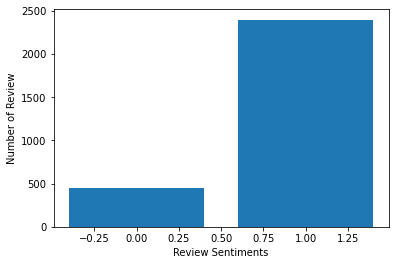

In [11]:
pos_neg_count=cleaner_movie.groupby('pos_neg_ind').count()
plt.bar(pos_neg_count.index.values, pos_neg_count['rating_text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#remove symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(cleaner_movie['rating_text'])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, cleaner_movie['rating_text'], test_size=0.2, random_state=1)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.0


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(cleaner_movie['rating_text'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, cleaner_movie['pos_neg_ind'], test_size=0.8, random_state=1)

In [19]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8408091468777484
